# Import Packages

In [100]:
# The OS module in python provides functions for interacting with the operating system
import os
# The matplotlib module provides all the fuctionalities for visualizing model
import matplotlib.pyplot as plt
# Here we'll import data processing libraries like tensorflow
import tensorflow as tf
import pandas as pd
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

# Load Dataset

In [101]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

# Download the training dataset file using the `tf.keras.utils.get_file` function. This returns the file path of the downloaded file.
train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /home/lokesh/.keras/datasets/iris_training.csv


In [102]:
iris_df=pd.read_csv(train_dataset_fp,names=['sepal_length','sepal_width','petal_length','petal_width','class'],skiprows=[0])
iris_df.head(-1)

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
114,5.0,3.5,1.6,0.6,0
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0


# Data Analysis

In [103]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   class         120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


In [104]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.845000,3.065000,3.739167,1.196667,1.000000
std,0.868578,0.427156,1.822100,0.782039,0.840168
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.075000,2.800000,1.500000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.425000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

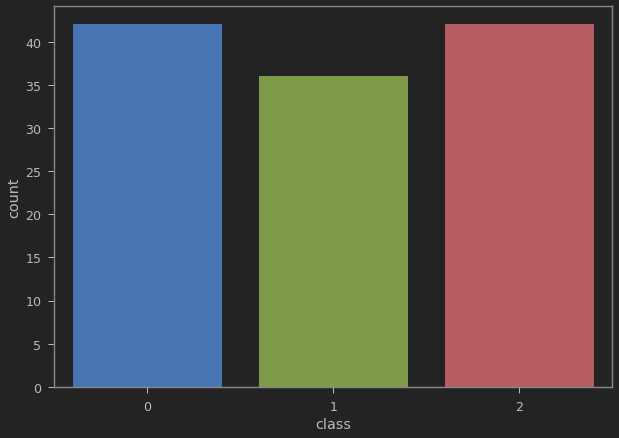

In [105]:
plt.figure(figsize=(10,7))
sns.countplot(iris_df['class'])

/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lokesh/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

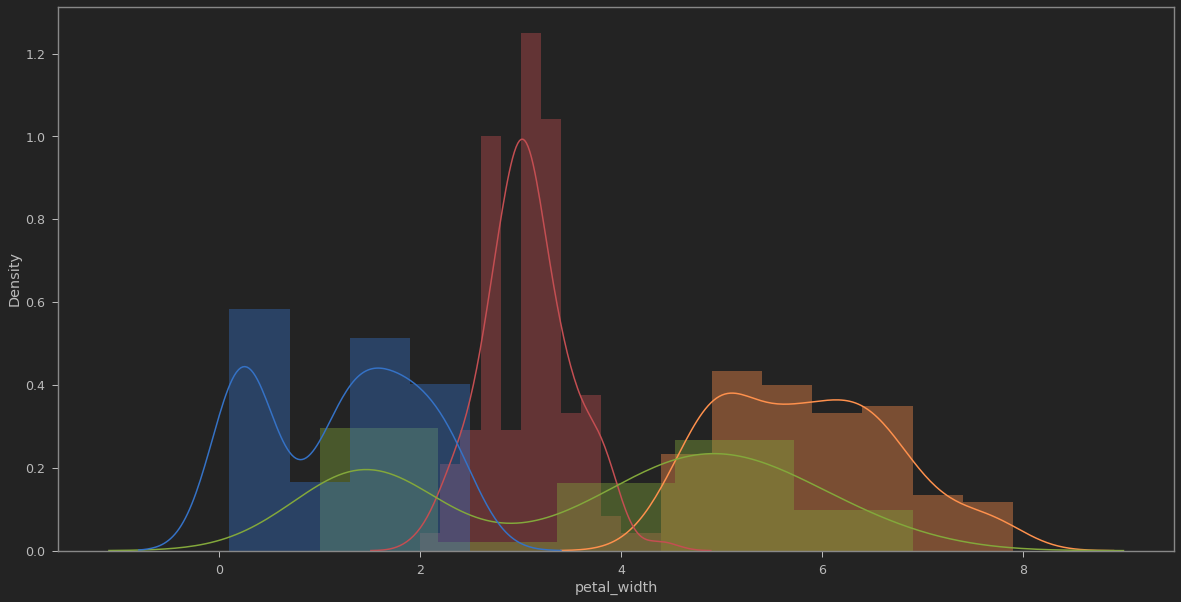

In [106]:
plt.figure(figsize=(20,10))
sns.distplot(iris_df['sepal_length'],color='y')
sns.distplot(iris_df['sepal_width'],color='r')
sns.distplot(iris_df['petal_length'],color='g')
sns.distplot(iris_df['petal_width'],color='b')

<Figure size 2160x2160 with 0 Axes>

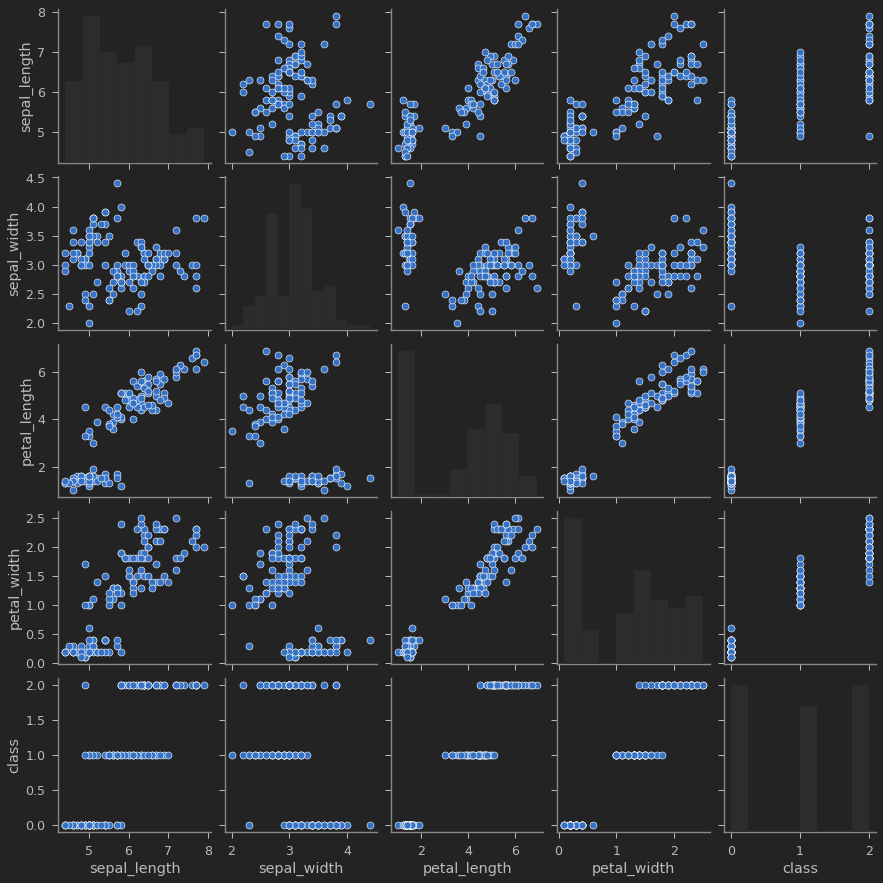

In [107]:
plt.figure(figsize=(30,30))
sns.pairplot(iris_df)

<AxesSubplot:>

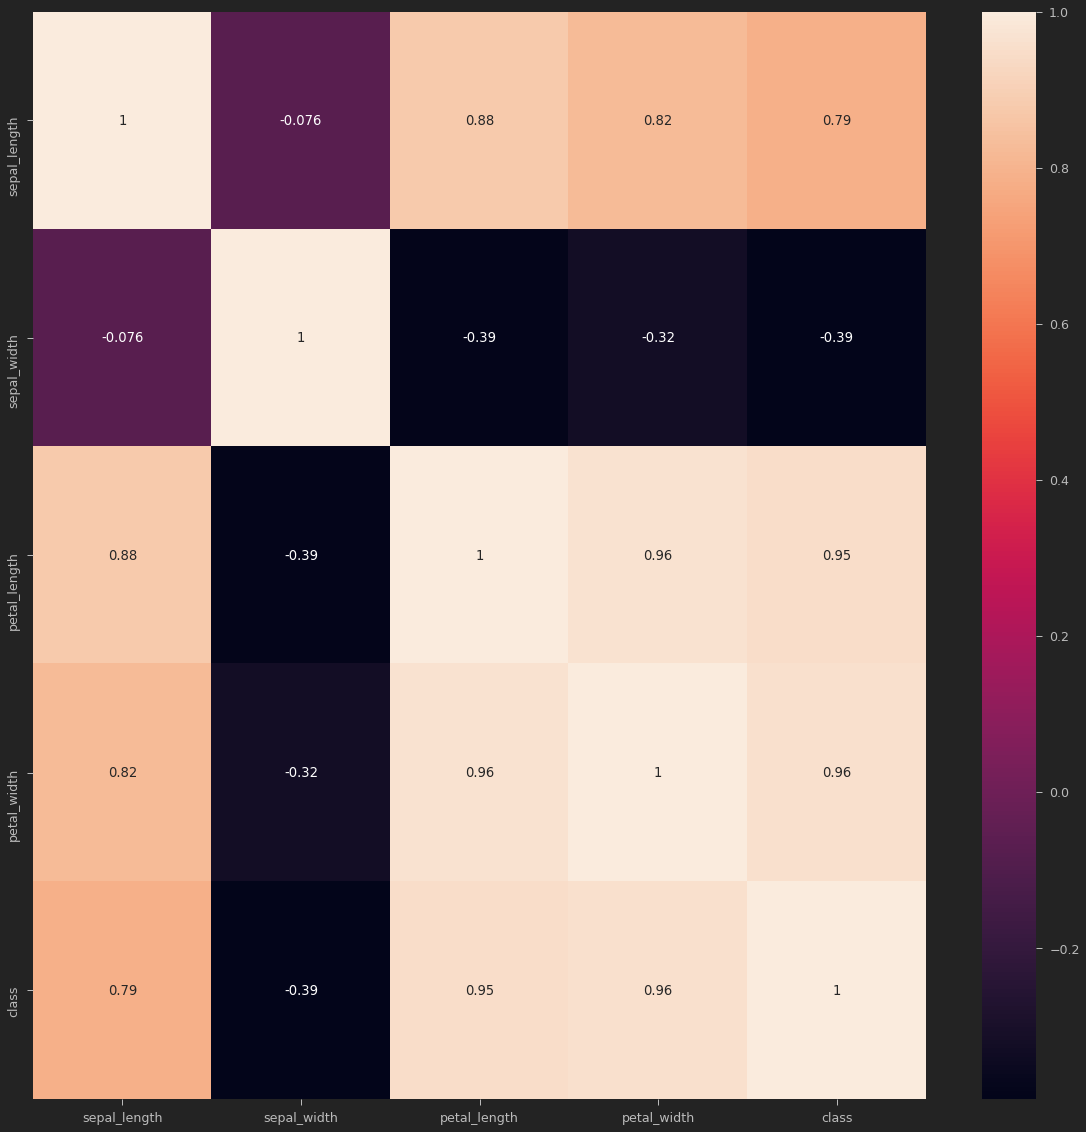

In [108]:
plt.figure(figsize=(20,20))
cm=iris_df.corr()
sns.heatmap(cm,annot=True)

# Preparing Dataset

In [109]:
# Column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

# Let's output the value of `Features` and `Label`
print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [110]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [111]:
batch_size = 32

# The `tf.data.experimental.make_csv_dataset()` method reads CSV files into a dataset
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [112]:
# The `next()` function returns the next item in an iterator.
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([6.2, 6.9, 5.1, 6. , 6.5, 6.5, 5.7, 5.7, 5.3, 6.9, 5.7, 5.4, 6.7,
       5.8, 5.5, 6.1, 5.6, 7.2, 6.4, 4.9, 6.6, 7.7, 6.3, 4.7, 4.4, 5. ,
       4.9, 5.9, 4.8, 4.4, 7.6, 5.7], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([2.8, 3.1, 3.5, 3. , 2.8, 3. , 3. , 2.9, 3.7, 3.2, 4.4, 3.4, 3.3,
       2.7, 3.5, 3. , 2.7, 3.2, 3.2, 3.1, 3. , 2.6, 3.3, 3.2, 3. , 3.4,
       2.5, 3. , 3.4, 3.2, 3. , 2.8], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.8, 4.9, 1.4, 4.8, 4.6, 5.8, 4.2, 4.2, 1.5, 5.7, 1.5, 1.5, 5.7,
       4.1, 1.3, 4.9, 4.2, 6. , 5.3, 1.5, 4.4, 6.9, 4.7, 1.6, 1.3, 1.5,
       4.5, 5.1, 1.6, 1.3, 6.6, 4.1], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.8, 1.5, 0.3, 1.8, 1.5, 2.2, 1.2, 1.3, 0.2, 2.3, 0.4, 0.4, 2.1,
       1. , 0.2, 1.8, 1.3, 1.8, 2.3, 0.1, 1.4, 2.3, 1.6, 0.2,

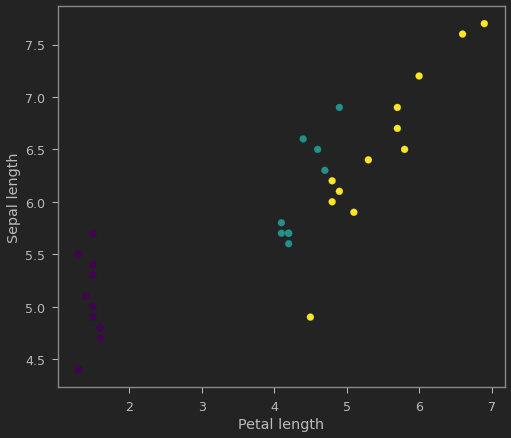

In [113]:
# A scatter plot is a diagram where each value in the data set is represented by a dot.
# A scatter plot of y vs x with varying marker size and/or color.
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
# Using show() method we can display a figure.
plt.show()

In [114]:
def pack_features_vector(features, labels):
    """Pack the features into a single array."""
    # Using `tf.stack` we can stack a list of rank-R tensors into one rank-(R+1) tensor.
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [115]:
# The `map()` method will pack the `features` into the training dataset:
train_dataset = train_dataset.map(pack_features_vector)

In [116]:
# The `next()` function returns the next item in an iterator.
features, labels = next(iter(train_dataset))

print(features[:10])

tf.Tensor(
[[6.  2.2 5.  1.5]
 [7.9 3.8 6.4 2. ]
 [5.9 3.  5.1 1.8]
 [6.2 2.8 4.8 1.8]
 [4.7 3.2 1.3 0.2]
 [5.  2.  3.5 1. ]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [7.2 3.6 6.1 2.5]
 [6.7 3.1 4.4 1.4]], shape=(10, 4), dtype=float32)


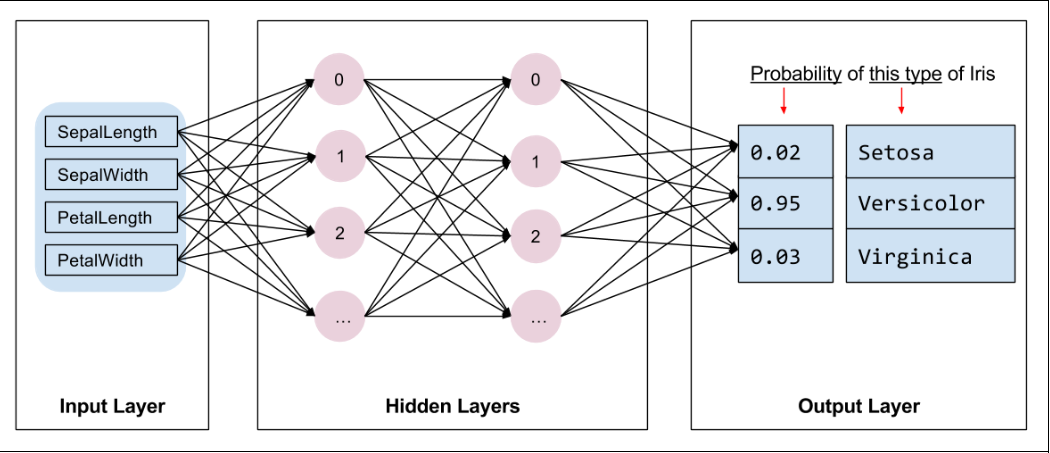

# Model 

In [117]:
# Here `tf.keras.Sequential` used to sequentially groups a linear stack of layers into a tf.keras.Model.
model = tf.keras.Sequential([
# `tf.keras.layers.Dense` is inherited from: `Layer`
# `tf.keras.layers.Dense` is your regular densely-connected NN layer.
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3,activation='softmax')
])

In [118]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1.9237351e-03, 9.4391769e-01, 5.4158568e-02],
       [5.2924122e-04, 9.7556067e-01, 2.3910088e-02],
       [2.1899967e-03, 9.4434243e-01, 5.3467575e-02],
       [2.1732249e-03, 9.4961053e-01, 4.8216235e-02],
       [1.4450423e-01, 7.2493589e-01, 1.3055989e-01]], dtype=float32)>

In [119]:
# `tf.keras.losses.SparseCategoricalCrossentropy()` will computes the crossentropy loss between the labels and predictions.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [120]:
def loss(model, x, y, training):
  # TODO 2
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
    y_ = model(x, training=training)
    return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 2.117760181427002


/home/lokesh/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4929: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


In [121]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        loss_value = loss(model, inputs, targets, training=True)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [122]:
# `tf.keras.optimizers.SGD()` will Gradient descent (with momentum) optimizer.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [123]:
loss_value, grads = grad(model, features, labels)

# Let's output the value of `Initial Loss` at `step 0`
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

# Let's output the value of `Loss` at `step 1`
print("Step: {},Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 2.117760181427002
Step: 1,Loss: 1.529327392578125


# Training the model

In [124]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
    for x, y in train_dataset:
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Track progress
        epoch_loss_avg.update_state(loss_value)  # Add current batch loss
        # Compare predicted label to actual label
        # training=True is needed only if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        epoch_accuracy.update_state(y, model(x, training=True))

          # End epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.201, Accuracy: 30.000%
Epoch 050: Loss: 0.297, Accuracy: 95.000%
Epoch 100: Loss: 0.190, Accuracy: 97.500%
Epoch 150: Loss: 0.138, Accuracy: 97.500%
Epoch 200: Loss: 0.139, Accuracy: 98.333%


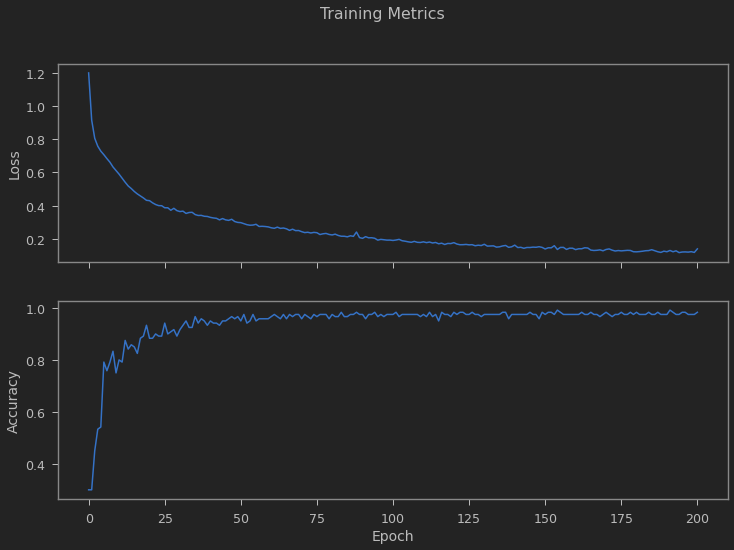

In [125]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
# `plt.show()` will display a figure
plt.show()

# Testing the model

In [126]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

# The `tf.keras.utils.get_file` will downloads a file from a URL if it not already in the cache.
test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [127]:
# The `tf.data.experimental.make_csv_dataset()` method reads CSV files into a dataset
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

# The `map()` method will pack the `features` into the training dataset:
test_dataset = test_dataset.map(pack_features_vector)

In [128]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
    logits = model(x, training=False)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
print("Test set accuracy: {:.3%}".format(test_accuracy.result()))


Test set accuracy: 93.333%


In [129]:

# Using `tf.stack` we can stack a list of rank-R tensors into one rank-(R+1) tensor.
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 2],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

# Inference

In [130]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
    class_idx = tf.argmax(logits).numpy()
    p = logits[class_idx]
    name = class_names[class_idx]
    print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.6%)
Example 1 prediction: Iris versicolor (86.8%)
Example 2 prediction: Iris virginica (89.2%)
